In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\rajni\Desktop\credit_risk_dataset.csv')

# Target variable - Loan Status
#### person_age-Age
#### person_income-Annual Income
#### person_home_ownership-Home ownership
#### person_emp_length-Employment length (in years)
#### loan_intent-Loan intent
#### loan_grade-Loan grade
#### loan_amnt-Loan amount
#### loan_int_rate-Interest rate
#### loan_status-Loan status (0 is non default 1 is default)
#### loan_percent_income-Percent income
#### cb_person_default_on_file-Historical default
#### cb_preson_cred_hist_length-Credit history length

# Exploratory Data Analysis

In [3]:
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.shape

(32581, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Here we can notice a few important things as the summary of the variables gives us a first insight of the data: 1.person_age has a strange result: the max value is 144 which is unlikely to be true 2.person_emp_length has a max value of 123 which is not possible

In [7]:
dups=df.duplicated()
df[dups]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [8]:
df.query("person_age==23 & person_income==42000 & person_home_ownership=='RENT' & loan_int_rate==9.99")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
6464,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4


In [9]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [10]:
df.shape

(32416, 12)

In [11]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


#### Checking for null values

<AxesSubplot:>

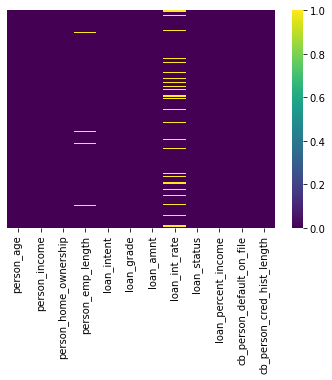

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [13]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [14]:
df.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173293,0.163001,0.050680,0.011760,-0.022698,-0.042300,0.859215
person_income,0.173293,1.000000,0.133903,0.265947,0.000878,-0.145005,-0.254472,0.117614
person_emp_length,0.163001,0.133903,1.000000,0.113183,-0.056607,-0.082817,-0.053999,0.144889
loan_amnt,0.050680,0.265947,0.113183,1.000000,0.146937,0.105736,0.572824,0.041865
loan_int_rate,0.011760,0.000878,-0.056607,0.146937,1.000000,0.335853,0.120207,0.015896
loan_status,-0.022698,-0.145005,-0.082817,0.105736,0.335853,1.000000,0.379697,-0.016498
loan_percent_income,-0.042300,-0.254472,-0.053999,0.572824,0.120207,0.379697,1.000000,-0.031457
cb_person_cred_hist_length,0.859215,0.117614,0.144889,0.041865,0.015896,-0.016498,-0.031457,1.000000


<AxesSubplot:>

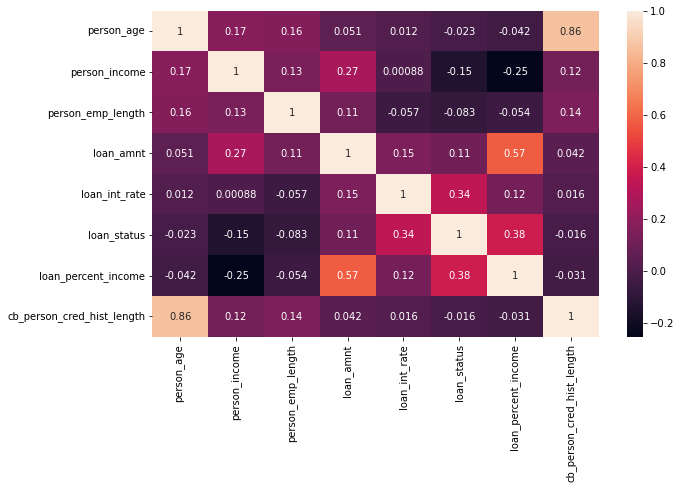

In [15]:
plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [16]:
# There is high  correlation betweeen between person_age and cb_person_cred_hist_length
# There is also high correlation between loan_amount and loan_percent_income
# There is also high correlation between loan_status and loan_percent_income
# There is also high correlation between loan_status and and loan_int_rate

array([[<AxesSubplot:title={'center':'person_age'}>,
        <AxesSubplot:title={'center':'person_income'}>,
        <AxesSubplot:title={'center':'person_emp_length'}>],
       [<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'loan_int_rate'}>,
        <AxesSubplot:title={'center':'loan_percent_income'}>],
       [<AxesSubplot:title={'center':'cb_person_cred_hist_length'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

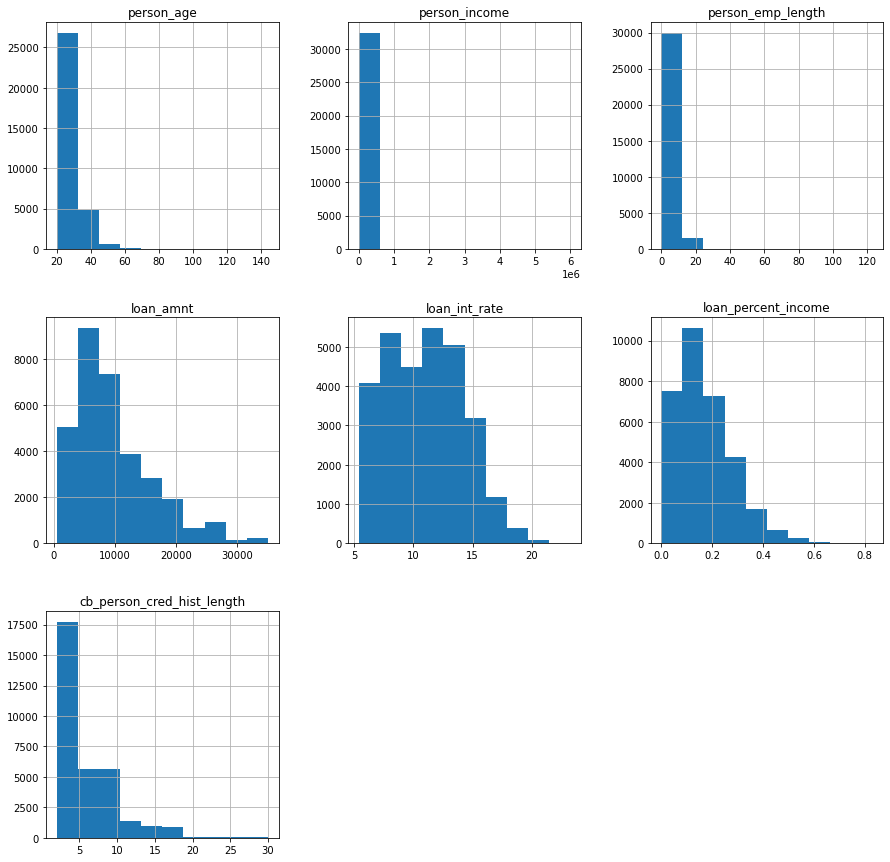

In [17]:
columns=['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']
df[columns].hist(figsize=(15,15))

Most of the loan takers belong to younger age group

In [18]:
df['loan_status'].value_counts()

0    25327
1     7089
Name: loan_status, dtype: int64

In [19]:
df['loan_status'].mean()

0.21868830207305034

In [20]:
percentage_default_loan=df['loan_status'].mean()*100
percentage_default_loan

21.868830207305034

<AxesSubplot:xlabel='loan_status', ylabel='count'>

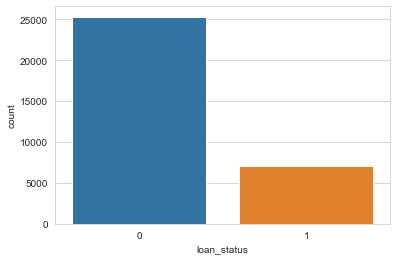

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',data=df)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

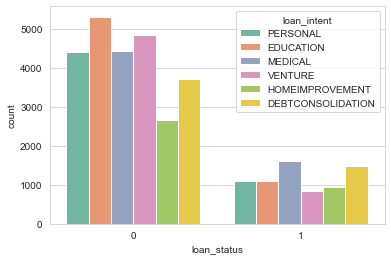

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',data=df,hue='loan_intent',palette='Set2')

As per the data analysed, it is evident that most of the loan taken for the medical purposes have gotten default.2nd in this row, loan taken for debt consolidaton has maximum default cases. 
Debt consolidation is the act of taking out a single loan to pay off multiple debts.

<AxesSubplot:xlabel='person_home_ownership', ylabel='count'>

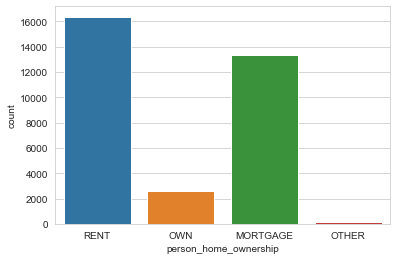

In [23]:
sns.countplot(x='person_home_ownership',data=df)

In [24]:
len(df.query("person_home_ownership=='RENT'"))

16378

In [25]:
df['person_home_ownership'].value_counts()[2]

2563

In [26]:
percent_own=df['person_home_ownership'].value_counts()[2]/df.shape[0]*100

In [27]:
percent_own

7.906589338598223

Most of the people who have taken loan are livinig in rental houses or their house is in mortgage. Only 7.9% of living in their own house.

<AxesSubplot:xlabel='loan_status', ylabel='count'>

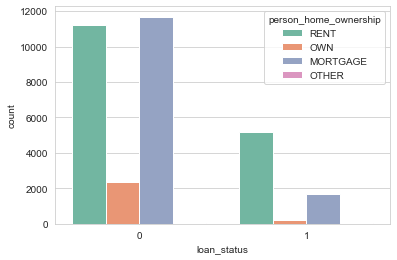

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',data=df,hue='person_home_ownership',palette='Set2')

<AxesSubplot:xlabel='person_home_ownership', ylabel='loan_status'>

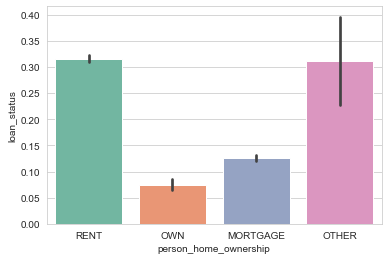

In [29]:
sns.barplot(x='person_home_ownership',y='loan_status',data=df,palette='Set2')

Most of the default loan belong to the people living in rental house.

In [30]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


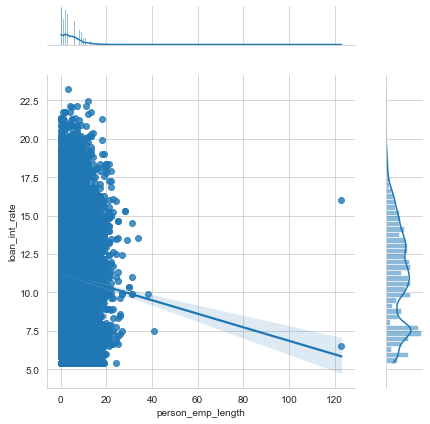

In [31]:
#find relationship between person employment length and interest rate
sns.jointplot(x='person_emp_length',y='loan_int_rate',data=df,kind='reg',space=0.8)

loan interest rate is decreasing with the increase in person employment length

<AxesSubplot:xlabel='loan_intent', ylabel='loan_int_rate'>

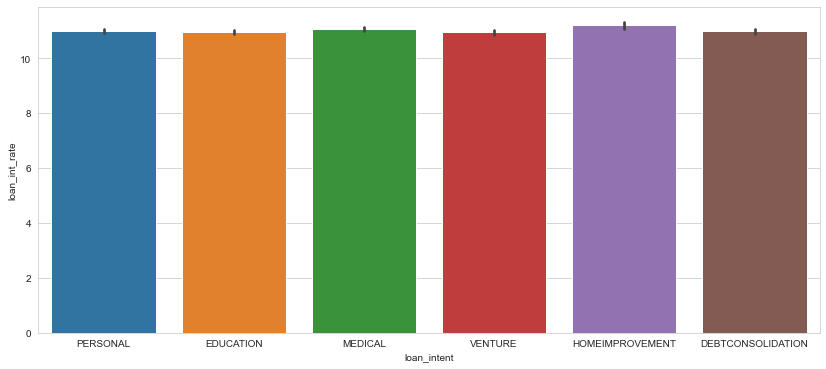

In [32]:
plt.subplots(figsize=(14,6))
sns.barplot(x='loan_intent',y='loan_int_rate',data=df)

Loan rate is about same for all purposes, mean value of loan rate for different purpose is approximately same. It can be also seen in exact mean value.

In [33]:
df.groupby(['loan_intent'])['loan_int_rate'].mean()

loan_intent
DEBTCONSOLIDATION    10.989592
EDUCATION            10.954704
HOMEIMPROVEMENT      11.209103
MEDICAL              11.064617
PERSONAL             11.004019
VENTURE              10.953557
Name: loan_int_rate, dtype: float64

<AxesSubplot:xlabel='loan_grade', ylabel='count'>

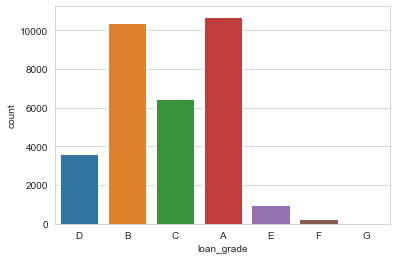

In [34]:
sns.countplot(x='loan_grade',data=df)

Most of the loans are from category 'A' and 'B'

<AxesSubplot:xlabel='loan_grade', ylabel='loan_status'>

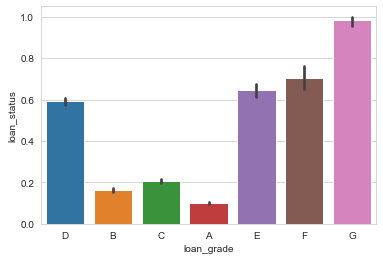

In [35]:
sns.barplot(x='loan_grade',y='loan_status',data=df)

The category divisoin of loan is very accurate ,  the loan that categorises in 'A' has least default while 'G' category has maximum default percentage

<AxesSubplot:xlabel='loan_grade', ylabel='count'>

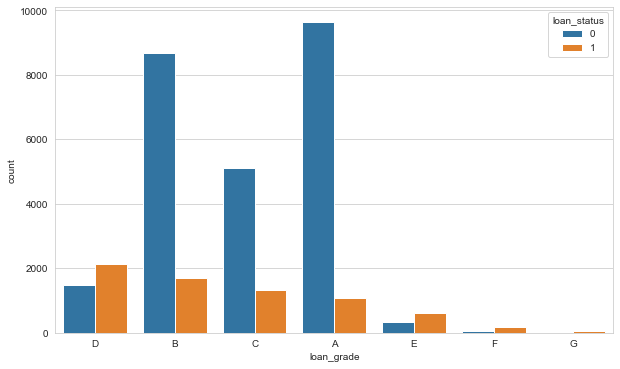

In [36]:
plt.subplots(figsize=(10,6))
sns.countplot(x='loan_grade',data=df,hue='loan_status')

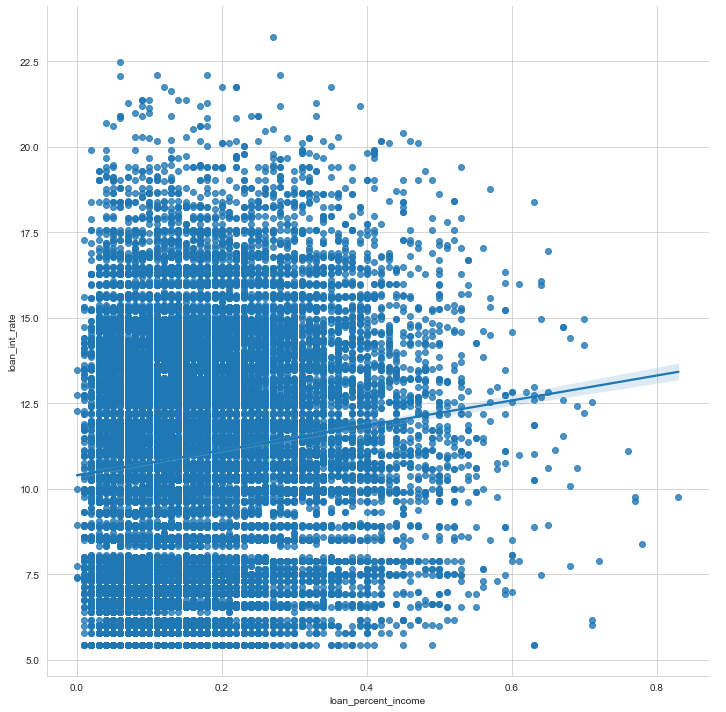

In [37]:
sns.FacetGrid(df,height=10).map(sns.regplot,'loan_percent_income','loan_int_rate').add_legend()

As the loan percent income increases the the expected value of the loan interest rate also increases.

In [38]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<AxesSubplot:xlabel='loan_grade', ylabel='loan_int_rate'>

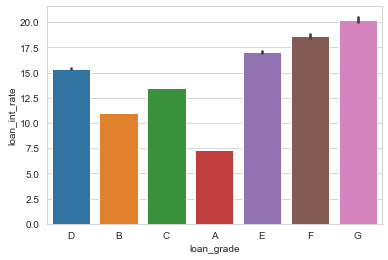

In [39]:
sns.barplot(x='loan_grade',y='loan_int_rate',data=df)

Lower the loan grade hhigher the loan interest rate.

<AxesSubplot:xlabel='loan_grade', ylabel='person_income'>

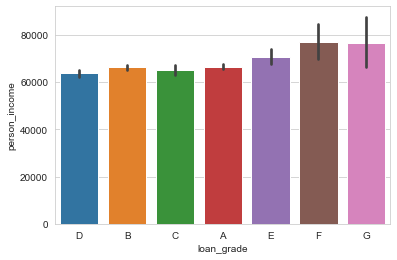

In [40]:
sns.barplot(x='loan_grade',y='person_income',data=df)

<AxesSubplot:xlabel='loan_grade', ylabel='loan_percent_income'>

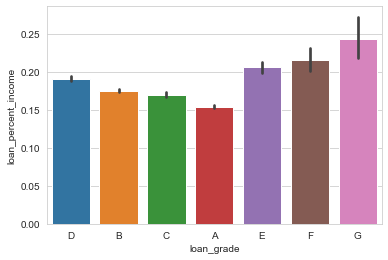

In [41]:
sns.barplot(x='loan_grade',y='loan_percent_income',data=df)

Here, an interesting finding is that people in the category of bad loan i.e, E,F,G have high average income. The reason of their default might be their loan_percent income is very high.

<AxesSubplot:xlabel='loan_grade', ylabel='count'>

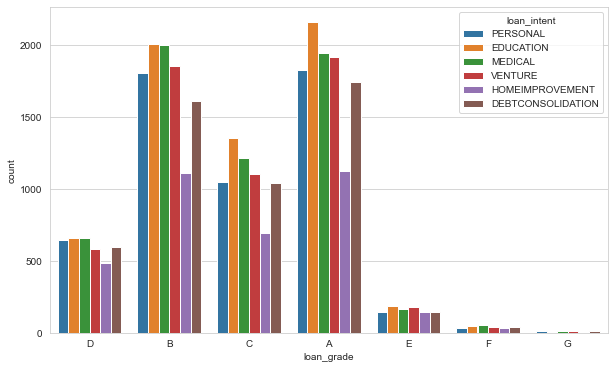

In [42]:
plt.subplots(figsize=(10,6))
sns.countplot(hue='loan_intent',x='loan_grade',data=df)

<AxesSubplot:xlabel='loan_intent', ylabel='person_age'>

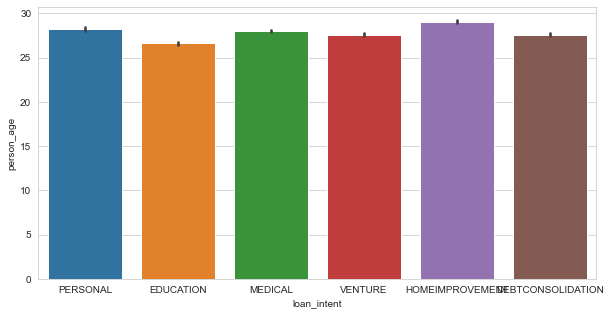

In [43]:
plt.subplots(figsize=(10,5))
sns.barplot(x='loan_intent',y='person_age',data=df)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

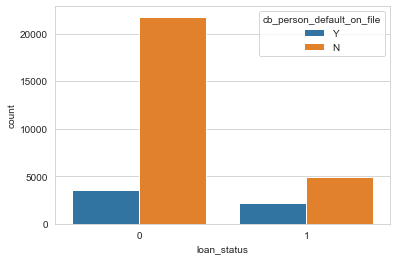

In [44]:
sns.countplot(hue='cb_person_default_on_file',x='loan_status',data=df)

In [45]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


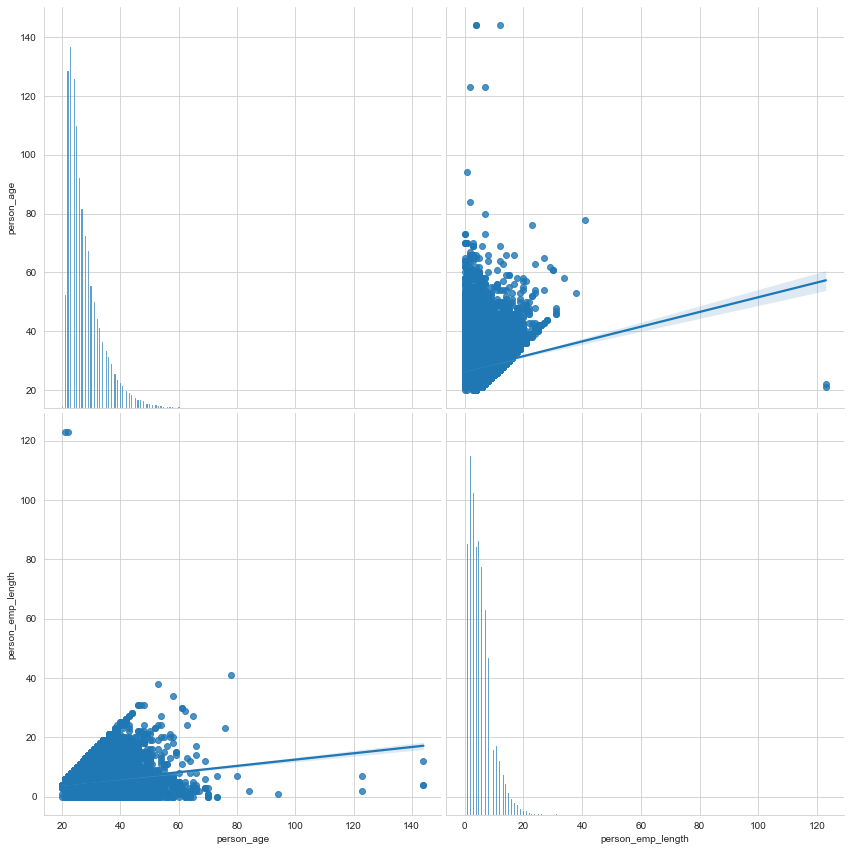

In [46]:
sns.pairplot(df[['person_age','person_emp_length']],kind='reg',height=6)

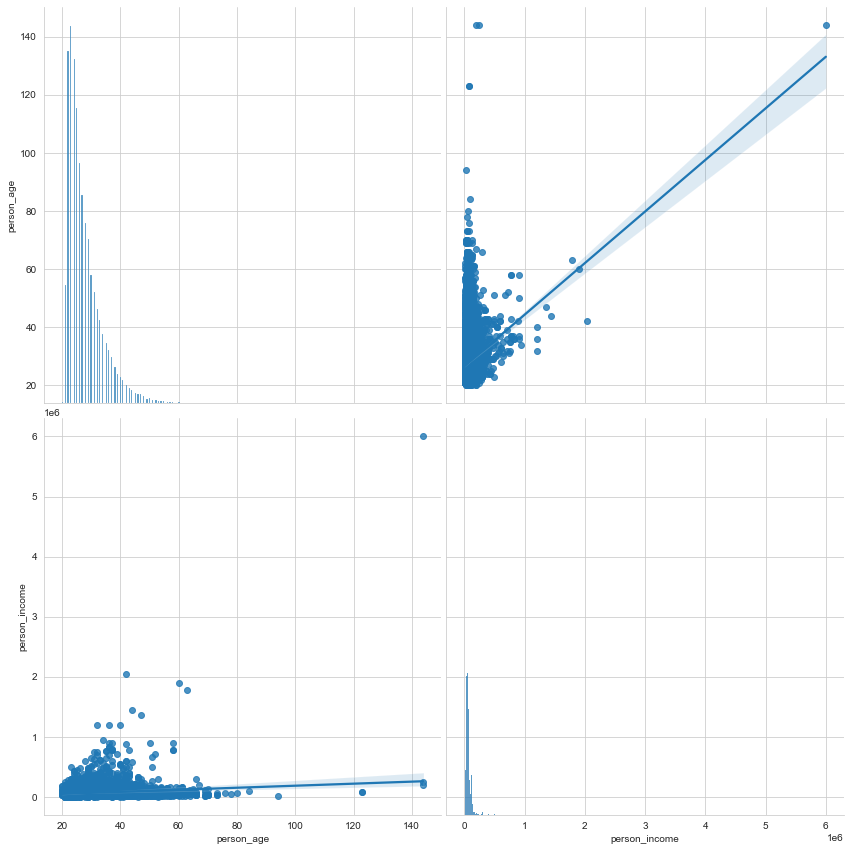

In [47]:
sns.pairplot(df[['person_age','person_income']],kind='reg',height=6)

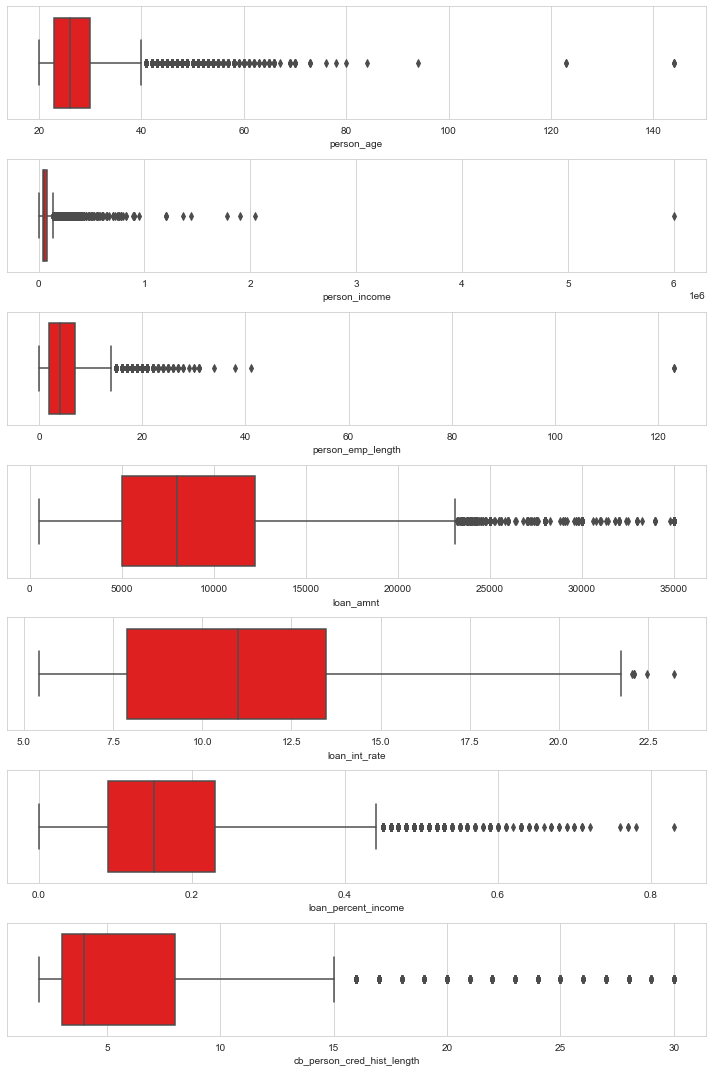

In [48]:
plt.subplots(figsize=(10,15))
for i in range(0,len(columns)):
    plt.subplot(len(columns),1,i+1)
    sns.boxplot(x=df[columns[i]],color='red')
    plt.tight_layout()
    

#### Dealing with Outliers

In [49]:
9,29

(9, 29)

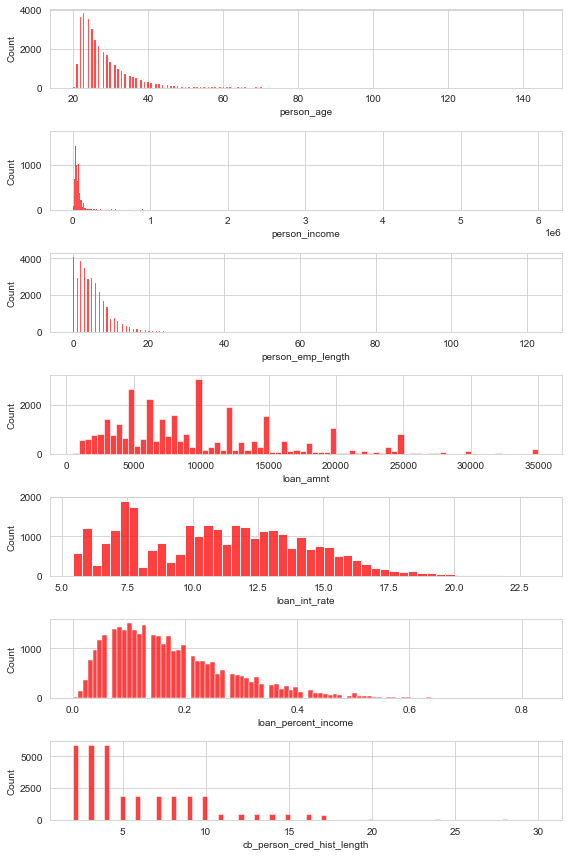

In [50]:
#either use histplot it this is not working
plt.subplots(figsize=(8,12))
for i in range(0,len(columns)):
    plt.subplot(len(columns),1,i+1)
    sns.histplot(x=df[columns[i]].dropna(),color='red')
    plt.tight_layout()

Most of the feature's data is right skewed.
Use IQR method to deal with the outliers

In [51]:
columns
    
    

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [52]:
def remove_outliers(df,variable):
    IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    upper_bridge=df[variable].quantile(0.75)+(IQR*3)
    df.loc[df[variable]>upper_bridge,variable]=upper_bridge

In [53]:
for i in columns:
    remove_outliers(df,i)

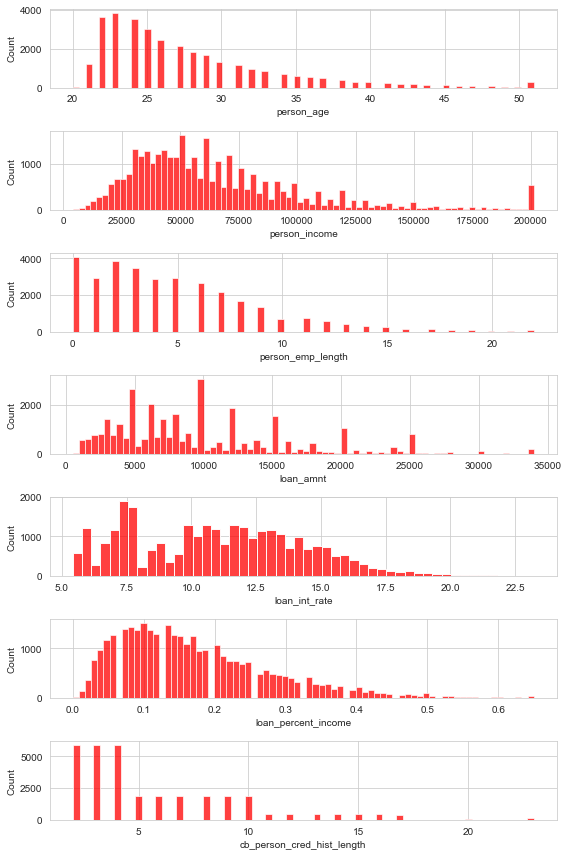

In [54]:
plt.subplots(figsize=(8,12))
for i in range(0,len(columns)):
    plt.subplot(len(columns),1,i+1)
    sns.histplot(x=df[columns[i]].dropna(),color='red')
    plt.tight_layout()

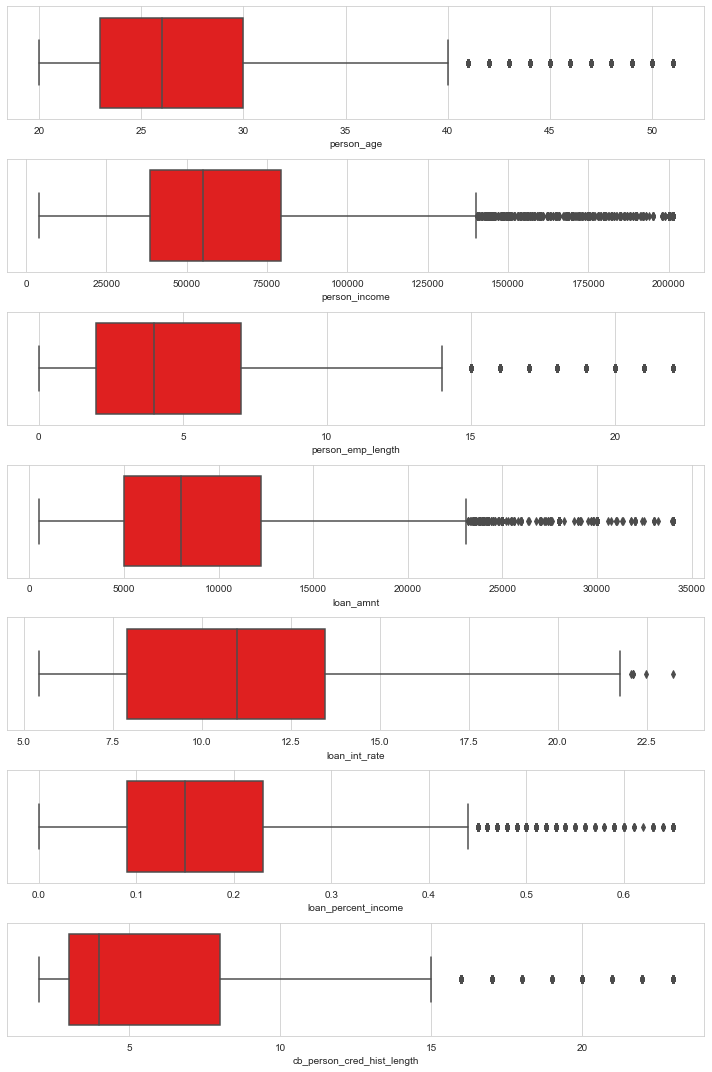

In [55]:
plt.subplots(figsize=(10,15))
for i in range(0,len(columns)):
    plt.subplot(len(columns),1,i+1)
    sns.boxplot(x=df[columns[i]],color='red')
    plt.tight_layout()

#### Handling Categorical values
We use Probability Ratio Encoding to deal with the categorical values of the column 'person_home _ownership'

In [56]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,22.0,PERSONAL,D,34000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,34000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,34000,14.27,1,0.55,Y,4


In [57]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [58]:
df['person_home_ownership'].value_counts()

RENT        16378
MORTGAGE    13369
OWN          2563
OTHER         106
Name: person_home_ownership, dtype: int64

In [59]:
df.groupby(['person_home_ownership'])['loan_status'].mean()

person_home_ownership
MORTGAGE    0.126187
OTHER       0.311321
OWN         0.074912
RENT        0.316095
Name: loan_status, dtype: float64

In 'loan_status', 1 is for default loan and 0 is for not default loan, Higher the mean higher the default value

In [60]:
prob_default=df.groupby(['person_home_ownership'])['loan_status'].mean()

In [61]:
prob_default=pd.DataFrame(prob_default)

In [62]:
prob_default['default']=prob_default['loan_status']

In [63]:
prob_default

,loan_status,default
person_home_ownership,,
MORTGAGE,0.126187,0.126187
OTHER,0.311321,0.311321
OWN,0.074912,0.074912
RENT,0.316095,0.316095


In [64]:
prob_default['not_default']=1-prob_default['default']

In [65]:
prob_default.head()

,loan_status,default,not_default
person_home_ownership,,,
MORTGAGE,0.126187,0.126187,0.873813
OTHER,0.311321,0.311321,0.688679
OWN,0.074912,0.074912,0.925088
RENT,0.316095,0.316095,0.683905


In [66]:
prob_default['probability_ratio']=prob_default['default']/prob_default['not_default']

In [67]:
prob_default['not_default']=1-prob_default['default']

In [68]:
prob_encode=prob_default['probability_ratio'].to_dict()

In [69]:
prob_encode

{'MORTGAGE': 0.14441020373223762,
 'OTHER': 0.452054794520548,
 'OWN': 0.0809784900885702,
 'RENT': 0.46219087581465934}

In [70]:
df['person_home_ownership_encoded']=df['person_home_ownership'].map(prob_encode)

In [71]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_encoded
0,22,59000,RENT,22.0,PERSONAL,D,34000,16.02,1,0.59,Y,3,0.462191
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.080978
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0.144410
3,23,65500,RENT,4.0,MEDICAL,C,34000,15.23,1,0.53,N,2,0.462191
4,24,54400,RENT,8.0,MEDICAL,C,34000,14.27,1,0.55,Y,4,0.462191


Now dealing with categorical value of the column 'loan_intent' using "Target Guided Ordinal Encoding"(mean ecoding)

In [72]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [73]:
#Target Guided Ordinal encodinig(mean encoding)
df.groupby(['loan_intent'])['loan_status'].mean()

loan_intent
DEBTCONSOLIDATION    0.286760
EDUCATION            0.172516
HOMEIMPROVEMENT      0.261547
MEDICAL              0.267627
PERSONAL             0.198981
VENTURE              0.148539
Name: loan_status, dtype: float64

In loan_intent 1 is for default loan and 0 is for non default loan so greater be the mean more will be the chance of default loan

In [74]:
mean_ordinal=df.groupby(['loan_intent'])['loan_status'].mean().to_dict()

In [75]:
mean_ordinal

{'DEBTCONSOLIDATION': 0.28676045480824824,
 'EDUCATION': 0.17251598814537514,
 'HOMEIMPROVEMENT': 0.2615470228158041,
 'MEDICAL': 0.2676266137040715,
 'PERSONAL': 0.1989814477991997,
 'VENTURE': 0.14853924674410418}

In [76]:
df['loan_intent_encoded']=df['loan_intent'].map(mean_ordinal)

In [77]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_encoded,loan_intent_encoded
0,22,59000,RENT,22.0,PERSONAL,D,34000,16.02,1,0.59,Y,3,0.462191,0.198981
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.080978,0.172516
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0.144410,0.267627
3,23,65500,RENT,4.0,MEDICAL,C,34000,15.23,1,0.53,N,2,0.462191,0.267627
4,24,54400,RENT,8.0,MEDICAL,C,34000,14.27,1,0.55,Y,4,0.462191,0.267627


In [78]:
df['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [79]:
df.groupby(['loan_grade'])['loan_status'].mean()

loan_grade
A    0.099598
B    0.163185
C    0.207518
D    0.590608
E    0.644860
F    0.705394
G    0.984375
Name: loan_status, dtype: float64

We can see that the grade is given on the approximate probability that the loan will not default, as 'A' is the best loan category so, the mean of 'A' is very low while mean of 'G' is high

In [80]:
dictionary={'G':1,'F':2,'E':3,'D':4,'C':5,'B':6,'A':7}

In [81]:
df['loan_grade_encoded']=df['loan_grade'].map(dictionary)

df.head()

In [82]:
df['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

In [83]:
df['cb_person_default_on_file_enc']=np.where(df['cb_person_default_on_file']=='Y',1,0)

In [84]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_encoded,loan_intent_encoded,loan_grade_encoded,cb_person_default_on_file_enc
0,22,59000,RENT,22.0,PERSONAL,D,34000,16.02,1,0.59,Y,3,0.462191,0.198981,4,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.080978,0.172516,6,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0.144410,0.267627,5,0
3,23,65500,RENT,4.0,MEDICAL,C,34000,15.23,1,0.53,N,2,0.462191,0.267627,5,0
4,24,54400,RENT,8.0,MEDICAL,C,34000,14.27,1,0.55,Y,4,0.462191,0.267627,5,1


#### Dealing with Missing Values
The dataset contains missng values in person_emp_length and loan_int_rate columns

In [85]:
#Now we see the percentage of missing values
len(df)

32416

In [86]:
df.isnull().sum()/len(df)*100

person_age                       0.000000
person_income                    0.000000
person_home_ownership            0.000000
person_emp_length                2.736303
loan_intent                      0.000000
loan_grade                       0.000000
loan_amnt                        0.000000
loan_int_rate                    9.547754
loan_status                      0.000000
loan_percent_income              0.000000
cb_person_default_on_file        0.000000
cb_person_cred_hist_length       0.000000
person_home_ownership_encoded    0.000000
loan_intent_encoded              0.000000
loan_grade_encoded               0.000000
cb_person_default_on_file_enc    0.000000
dtype: float64

Now I want to see if there any specific age group where person employment length has more missing values.

In [87]:
ds=df.loc[np.where(df['person_emp_length'].isnull())]

In [88]:
ds.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_encoded,loan_intent_encoded,loan_grade_encoded,cb_person_default_on_file_enc
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4,0.144410,0.198981,7,0
222,24,185000,MORTGAGE,NaN,EDUCATION,B,34000,12.42,0,0.19,N,2,0.144410,0.172516,6,0
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3,0.144410,0.286760,7,0
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2,0.462191,0.198981,6,0
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3,0.144410,0.172516,5,1


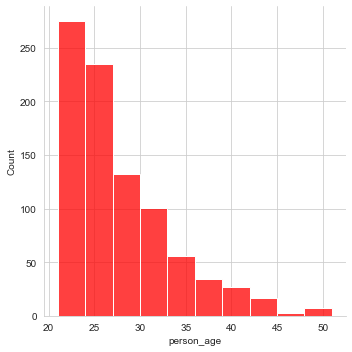

In [89]:
sns.displot(ds['person_age'],kde=False,color='red',bins=10)

Null value is not asociated with specific age group.From the graph, we can see that nan value is present in every age group, most of the people who have taken a loan come from an age group 20-40. So, in this age group range most of the nan values also found. 

So the missing value is at random and we use RANDOM SAMPLE IMPUTATION to deal with missing values in person_emp_length.

In [90]:
df['person_emp_length'].dropna().sample(df['person_emp_length'].isnull().sum(),random_state=0)

14574     2.0
3267      0.0
27248     0.0
21742    14.0
6396      8.0
         ... 
2738      5.0
4082      8.0
888       1.0
7304      5.0
8470      5.0
Name: person_emp_length, Length: 887, dtype: float64

In [92]:
df['emp_len_random']=df['person_emp_length']
random_sample=df['person_emp_length'].dropna().sample(df['person_emp_length'].isnull().sum(),random_state=0)
random_sample.index=df[df['person_emp_length'].isnull()].index
df.loc[df['emp_len_random'].isnull(),'emp_len_random']=random_sample


In [93]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_encoded,loan_intent_encoded,loan_grade_encoded,cb_person_default_on_file_enc,emp_len_random
0,22,59000,RENT,22.0,PERSONAL,D,34000,16.02,1,0.59,Y,3,0.462191,0.198981,4,1,22.0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.080978,0.172516,6,0,5.0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0.144410,0.267627,5,0,1.0
3,23,65500,RENT,4.0,MEDICAL,C,34000,15.23,1,0.53,N,2,0.462191,0.267627,5,0,4.0
4,24,54400,RENT,8.0,MEDICAL,C,34000,14.27,1,0.55,Y,4,0.462191,0.267627,5,1,8.0


Use KNN Imputer to fill the missing values of column loan interest rate

In [97]:
data=df.drop(['person_home_ownership','loan_grade','loan_intent','cb_person_default_on_file','person_emp_length'],axis=1)

In [98]:
data.head()

,person_age,person_income,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_encoded,loan_intent_encoded,loan_grade_encoded,cb_person_default_on_file_enc,emp_len_random
0,22,59000,34000,16.02,1,0.59,3,0.462191,0.198981,4,1,22.0
1,21,9600,1000,11.14,0,0.10,2,0.080978,0.172516,6,0,5.0
2,25,9600,5500,12.87,1,0.57,3,0.144410,0.267627,5,0,1.0
3,23,65500,34000,15.23,1,0.53,2,0.462191,0.267627,5,0,4.0
4,24,54400,34000,14.27,1,0.55,4,0.462191,0.267627,5,1,8.0


In [94]:
from sklearn.impute import KNNImputer

In [95]:
knnimp=KNNImputer(n_neighbors=5)

In [99]:
knnimp.fit_transform(data)

array([[2.200e+01, 5.900e+04, 3.400e+04, ..., 4.000e+00, 1.000e+00,
        2.200e+01],
       [2.100e+01, 9.600e+03, 1.000e+03, ..., 6.000e+00, 0.000e+00,
        5.000e+00],
       [2.500e+01, 9.600e+03, 5.500e+03, ..., 5.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [5.100e+01, 7.600e+04, 3.400e+04, ..., 6.000e+00, 0.000e+00,
        3.000e+00],
       [5.100e+01, 1.500e+05, 1.500e+04, ..., 6.000e+00, 0.000e+00,
        5.000e+00],
       [5.100e+01, 4.200e+04, 6.475e+03, ..., 6.000e+00, 0.000e+00,
        2.000e+00]])

In [100]:
data=pd.DataFrame(knnimp.fit_transform(data))

In [101]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,22.0,59000.0,34000.0,16.02,1.0,0.59,3.0,0.462191,0.198981,4.0,1.0,22.0
1,21.0,9600.0,1000.0,11.14,0.0,0.10,2.0,0.080978,0.172516,6.0,0.0,5.0
2,25.0,9600.0,5500.0,12.87,1.0,0.57,3.0,0.144410,0.267627,5.0,0.0,1.0
3,23.0,65500.0,34000.0,15.23,1.0,0.53,2.0,0.462191,0.267627,5.0,0.0,4.0
4,24.0,54400.0,34000.0,14.27,1.0,0.55,4.0,0.462191,0.267627,5.0,1.0,8.0


In [102]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [103]:
df['int_rate_knn']=data[3]

In [104]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_encoded,loan_intent_encoded,loan_grade_encoded,cb_person_default_on_file_enc,emp_len_random,int_rate_knn
0,22,59000,RENT,22.0,PERSONAL,D,34000,16.02,1,0.59,Y,3,0.462191,0.198981,4,1,22.0,16.02
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.080978,0.172516,6,0,5.0,11.14
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0.144410,0.267627,5,0,1.0,12.87
3,23,65500,RENT,4.0,MEDICAL,C,34000,15.23,1,0.53,N,2,0.462191,0.267627,5,0,4.0,15.23
4,24,54400,RENT,8.0,MEDICAL,C,34000,14.27,1,0.55,Y,4,0.462191,0.267627,5,1,8.0,14.27


<AxesSubplot:>

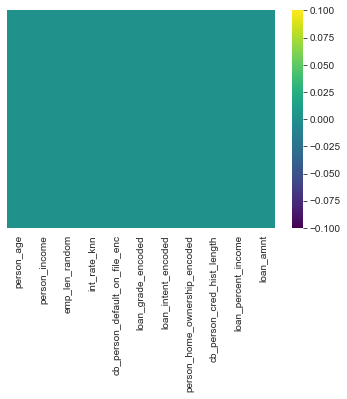

In [107]:
sns.heatmap(df[['person_age','person_income','emp_len_random','int_rate_knn','cb_person_default_on_file_enc','loan_grade_encoded','loan_intent_encoded','person_home_ownership_encoded','cb_person_cred_hist_length','loan_percent_income','loan_amnt']].isnull(),yticklabels=False,cbar=True,cmap='viridis')

No missing values in required dataset

## Using Machine Learning Algorithm and finding results

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['person_age','person_income','int_rate_knn','emp_len_random','cb_person_default_on_file_enc','loan_grade_encoded','loan_intent_encoded','person_home_ownership_encoded','cb_person_cred_hist_length','loan_percent_income','loan_amnt']],df['loan_status'],test_size=0.3)

In [106]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
classifier_knn.fit(X_train,y_train)
y_pred=classifier_knn.predict(X_test)
y_pred1=classifier_knn.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print('Accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score:{}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score:0.8326992287917738
roc_auc_score:0.8090497545550527


In [108]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print('Accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score:{}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score:0.8048329048843188
roc_auc_score:0.7553754509921368


In [109]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print('Accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score:{}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score:0.9339845758354756
roc_auc_score:0.9350112344089694
